In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/Thalassemia/Alpha_test_thalassemia.xlsx')
data.head()

,Age,Sex 1: female / 2: male,Group,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count
0,28,1,4,7.2,24.2,62.7,18.7,29.8,24.7,3.86
1,23,1,4,7.2,24.4,56.5,16.7,29.5,26.1,4.32
2,39,1,4,7.3,24.0,68.0,20.0,30.0,26.1,3.57
3,27,1,4,7.5,27.7,72.9,19.7,27.1,20.4,3.80
4,29,1,4,7.9,27.4,58.2,16.8,28.8,28.0,4.71


In [8]:
import pandas as pd

# Load the data
data = pd.read_excel('/content/drive/MyDrive/Thalassemia/Alpha_test_thalassemia.xlsx')

# Replace values in the 'Group' column
data['Group'] = data['Group'].replace({1: 0, 2: 1, 3: 2, 4: 3})

# Save the modified DataFrame to a new Excel file
data.to_excel('/content/drive/MyDrive/Thalassemia/Alpha_test_thalassemia1.xlsx', index=False)

# Check the first few rows of the updated data
data.head()


,Age,Sex 1: female / 2: male,Group,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count
0,28,1,3,7.2,24.2,62.7,18.7,29.8,24.7,3.86
1,23,1,3,7.2,24.4,56.5,16.7,29.5,26.1,4.32
2,39,1,3,7.3,24.0,68.0,20.0,30.0,26.1,3.57
3,27,1,3,7.5,27.7,72.9,19.7,27.1,20.4,3.80
4,29,1,3,7.9,27.4,58.2,16.8,28.8,28.0,4.71


In [13]:
import pandas as pd

# Load the data
data = pd.read_excel('/content/drive/MyDrive/Thalassemia/Alpha_test_thalassemia1.xlsx')

# Drop the 'Age' and 'Sex 1: female / 2: male' columns
data = data.drop(columns=['Age', 'Sex 1: female / 2: male'])

# Save the modified DataFrame to a new Excel file
data.to_excel('/content/drive/MyDrive/Thalassemia/Alpha_test_thalassemia2.xlsx', index=False)

# Check the first few rows of the updated data
data.head()


,Group,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count
0,3,7.2,24.2,62.7,18.7,29.8,24.7,3.86
1,3,7.2,24.4,56.5,16.7,29.5,26.1,4.32
2,3,7.3,24.0,68.0,20.0,30.0,26.1,3.57
3,3,7.5,27.7,72.9,19.7,27.1,20.4,3.80
4,3,7.9,27.4,58.2,16.8,28.8,28.0,4.71


In [17]:
import pandas as pd

# Load the data from the file
data = pd.read_excel('/content/drive/MyDrive/Thalassemia/Alpha_test_thalassemia2.xlsx')

# Function to remove outliers using IQR (Interquartile Range)
def remove_outliers_IQR(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers by filtering data
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Remove outliers in the dataset
cleaned_data = remove_outliers_IQR(data)

# Save the cleaned data to a new file
cleaned_data.to_excel('/content/drive/MyDrive/Thalassemia/Alpha_test_thalassemia3.xlsx', index=False)

# Show the first few rows of the cleaned data
cleaned_data.head()


,Group,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count
7,2,8.6,27.8,74.1,22.9,30.9,15.3,3.75
10,2,9.1,29.0,75.0,24.0,32.0,14.0,3.83
16,1,10.0,33.0,81.0,25.0,31.0,13.3,4.00
18,2,10.0,32.0,70.0,22.0,31.0,15.1,4.55
19,2,10.0,31.0,67.0,22.0,32.0,15.5,4.66


In [60]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/Thalassemia/Alpha_test_thalassemia3.xlsx')
data.head()

,Group,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count
0,2,8.6,27.8,74.1,22.9,30.9,15.3,3.75
1,2,9.1,29.0,75.0,24.0,32.0,14.0,3.83
2,1,10.0,33.0,81.0,25.0,31.0,13.3,4.00
3,2,10.0,32.0,70.0,22.0,31.0,15.1,4.55
4,2,10.0,31.0,67.0,22.0,32.0,15.5,4.66


In [19]:
data

,Group,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count
0,2,8.6,27.8,74.1,22.9,30.9,15.3,3.75
1,2,9.1,29.0,75.0,24.0,32.0,14.0,3.83
2,1,10.0,33.0,81.0,25.0,31.0,13.3,4.00
3,2,10.0,32.0,70.0,22.0,31.0,15.1,4.55
4,2,10.0,31.0,67.0,22.0,32.0,15.5,4.66
...,...,...,...,...,...,...,...,...
579,0,17.2,48.0,83.0,30.0,36.0,12.1,5.77
580,0,17.4,49.5,85.6,30.1,35.2,12.6,5.78
581,0,17.4,52.0,87.0,29.0,34.0,11.6,5.96
582,1,17.5,52.0,87.0,29.0,34.0,13.1,5.98


In [101]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/Thalassemia/Alpha_test_thalassemia1.xlsx')
data.head()

,Age,Sex 1: female / 2: male,Group,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count
0,28,1,3,7.2,24.2,62.7,18.7,29.8,24.7,3.86
1,23,1,3,7.2,24.4,56.5,16.7,29.5,26.1,4.32
2,39,1,3,7.3,24.0,68.0,20.0,30.0,26.1,3.57
3,27,1,3,7.5,27.7,72.9,19.7,27.1,20.4,3.80
4,29,1,3,7.9,27.4,58.2,16.8,28.8,28.0,4.71


In [102]:
# Split features and target
X = data.drop('Group', axis=1)
y = data['Group']

# Display the encoded dataset
print(X)
print(y)

     Age  Sex 1: female / 2: male    Hb   Hct   MCV   MCH  MCHC   RDW  \
0     28                        1   7.2  24.2  62.7  18.7  29.8  24.7   
1     23                        1   7.2  24.4  56.5  16.7  29.5  26.1   
2     39                        1   7.3  24.0  68.0  20.0  30.0  26.1   
3     27                        1   7.5  27.7  72.9  19.7  27.1  20.4   
4     29                        1   7.9  27.4  58.2  16.8  28.8  28.0   
..   ...                      ...   ...   ...   ...   ...   ...   ...   
611   26                        2  17.2  48.0  83.0  30.0  36.0  12.1   
612   24                        2  17.4  49.5  85.6  30.1  35.2  12.6   
613   40                        2  17.4  52.0  87.0  29.0  34.0  11.6   
614   28                        2  17.5  52.0  87.0  29.0  34.0  13.1   
615   25                        2  17.8  53.0  91.0  30.0  34.0  11.0   

     RBC count  
0         3.86  
1         4.32  
2         3.57  
3         3.80  
4         4.71  
..         ...  
611 

In [103]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [22]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=81d5ac3a4531048aff725fe1981b68d2c6d854261821923df8532beee8428404
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

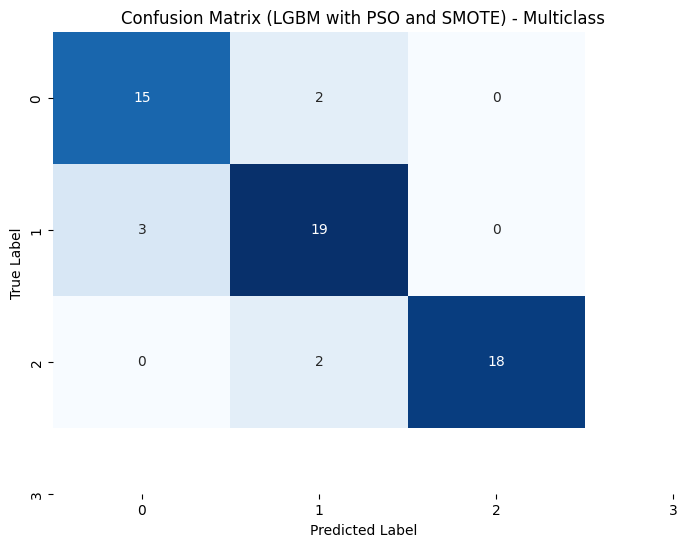

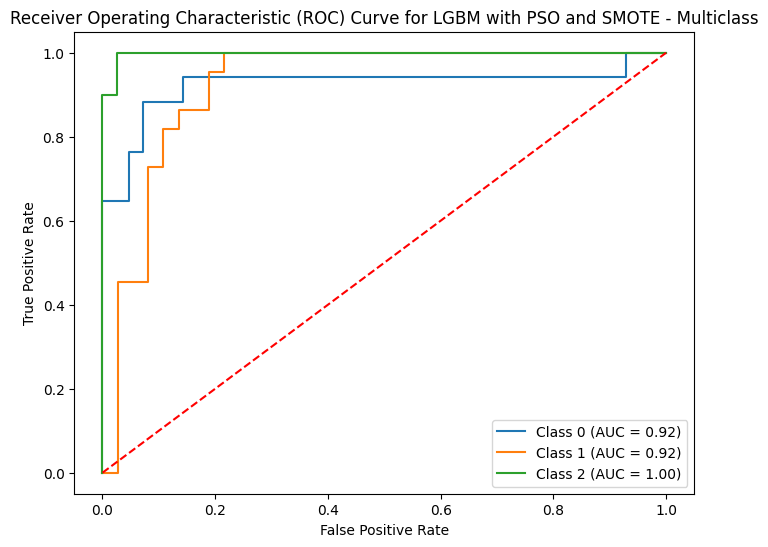

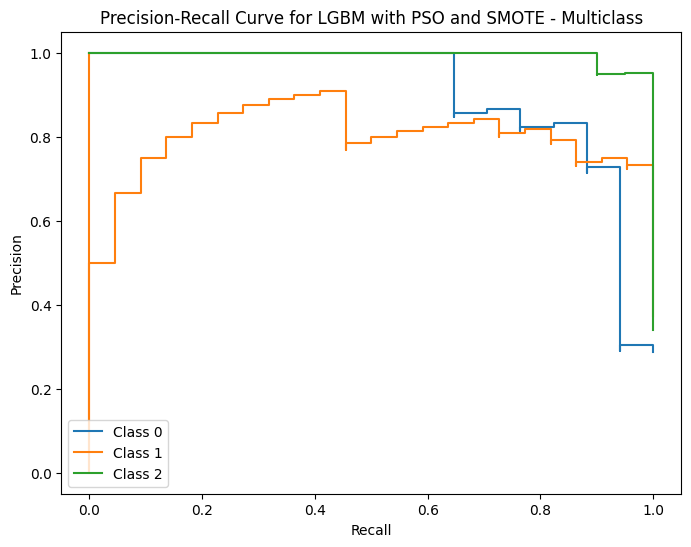

In [96]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate
    max_depth = int(params[2])     # Maximum depth of trees

    # Initialize the LGBM classifier with the given parameters
    lgbm_classifier = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    # Train the model on resampled training data
    lgbm_classifier.fit(X_train_res, y_train_res)

    # Evaluate on test set
    y_test_pred = lgbm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate, max_depth)
lb = [10, 0.01, 3]  # Lower bounds for [n_estimators, learning_rate, max_depth]
ub = [200, 1.0, 15]  # Upper bounds for [n_estimators, learning_rate, max_depth]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]
best_max_depth = int(best_params[2])

# Train the LGBM classifier with the optimized hyperparameters
lgbm_classifier = LGBMClassifier(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42
)
lgbm_classifier.fit(X_train_res, y_train_res)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set (multiclass)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("\nAccuracy:", accuracy_test)
print("Precision (Macro):", precision_test)
print("Recall (Macro):", recall_test)
print("F1-Score (Macro):", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set (multiclass)
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (LGBM with PSO and SMOTE) - Multiclass')
plt.show()

# Plot ROC curve for multiclass (One-vs-Rest approach)
y_pred_probs = lgbm_classifier.predict_proba(X_test)  # Get probabilities for all classes
n_classes = y_pred_probs.shape[1]

# Initialize plot
plt.figure(figsize=(8, 6))

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_probs[:, i])  # One-vs-Rest for each class
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LGBM with PSO and SMOTE - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve for multiclass (One-vs-Rest approach)
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision_curve, recall_curve, _ = precision_recall_curve(y_test == i, y_pred_probs[:, i])
    plt.step(recall_curve, precision_curve, where='post', label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LGBM with PSO and SMOTE - Multiclass')
plt.legend(loc="lower left")
plt.show()


In [98]:

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Stopping search: maximum iterations reached --> 20

Accuracy: 0.9428571428571428
Precision (Macro): 0.938840579710145
Recall (Macro): 0.9432924382878983
F1-Score (Macro): 0.9403822055137844

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.86      0.93      0.90        46
           2       1.00      0.97      0.98        58

    accuracy                           0.94       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.95      0.94      0.94       175



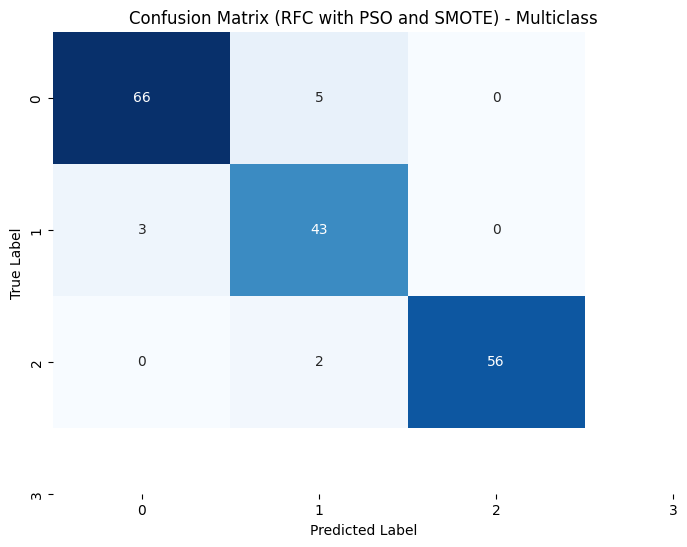

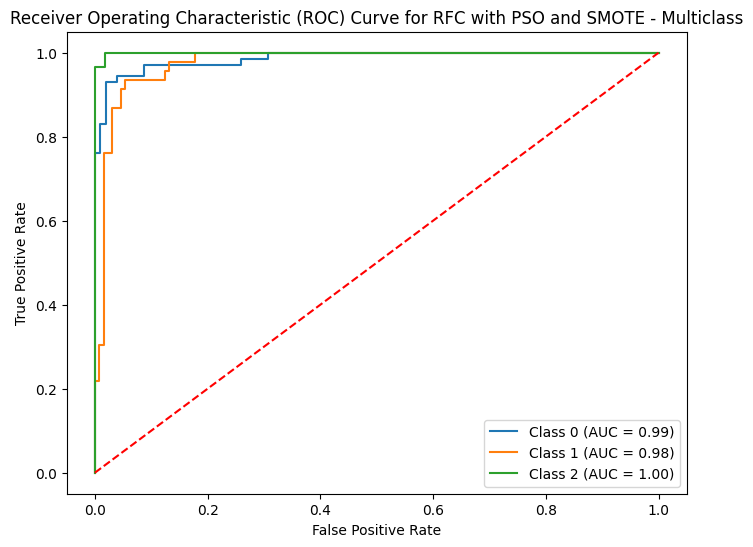

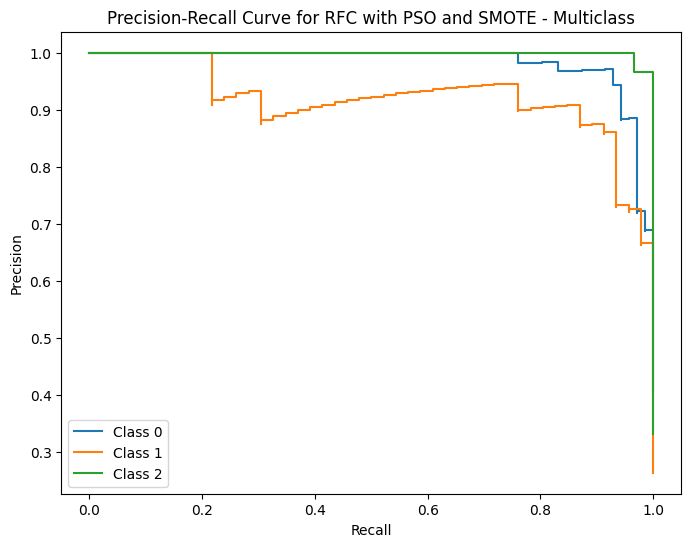

In [99]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso
from imblearn.over_sampling import SMOTE

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    max_depth = int(params[1])     # Maximum depth of trees
    min_samples_split = int(params[2])  # Minimum samples required to split a node
    min_samples_leaf = int(params[3])  # Minimum samples required at a leaf node

    # Initialize the RandomForest classifier with the given parameters
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Train the model on resampled training data
    rf_classifier.fit(X_train_res, y_train_res)

    # Evaluate on test set
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, max_depth, min_samples_split, min_samples_leaf)
lb = [10, 3, 2, 1]  # Lower bounds for [n_estimators, max_depth, min_samples_split, min_samples_leaf]
ub = [200, 15, 10, 10]  # Upper bounds for [n_estimators, max_depth, min_samples_split, min_samples_leaf]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_max_depth = int(best_params[1])
best_min_samples_split = int(best_params[2])
best_min_samples_leaf = int(best_params[3])

# Train the RandomForest classifier with the optimized hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)
rf_classifier.fit(X_train_res, y_train_res)

# Evaluate on test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set (multiclass)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("\nAccuracy:", accuracy_test)
print("Precision (Macro):", precision_test)
print("Recall (Macro):", recall_test)
print("F1-Score (Macro):", f1_test)

# Generate and display classification report for test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report_test)

# Plot confusion matrix for test set (multiclass)
confusion_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (RFC with PSO and SMOTE) - Multiclass')
plt.show()

# Plot ROC curve for multiclass (One-vs-Rest approach)
y_pred_probs = rf_classifier.predict_proba(X_test)  # Get probabilities for all classes
n_classes = y_pred_probs.shape[1]

# Initialize plot
plt.figure(figsize=(8, 6))

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_probs[:, i])  # One-vs-Rest for each class
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RFC with PSO and SMOTE - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve for multiclass (One-vs-Rest approach)
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision_curve, recall_curve, _ = precision_recall_curve(y_test == i, y_pred_probs[:, i])
    plt.step(recall_curve, precision_curve, where='post', label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RFC with PSO and SMOTE - Multiclass')
plt.legend(loc="lower left")
plt.show()


In [5]:
!pip install scikit-learn deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.0 MB/s eta 0:00:00


In [6]:
!pip install torch torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 997.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [104]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data


# Stage 1: Mutual Information Pre-Filtering
def mutual_info_filter(X, y, threshold_percentile=70):
    mi_scores = mutual_info_classif(X, y, random_state=42)
    mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
    threshold = np.percentile(mi_scores, 100 - threshold_percentile)
    selected_features = mi_df[mi_df['MI_Score'] >= threshold]['Feature'].tolist()
    return selected_features, mi_df

# Stage 2: RF + XGBoost Ensemble with RFE
def ensemble_rfe(X, y, selected_features):
    X_subset = X[selected_features]

    # Standardize continuous features
    scaler = StandardScaler()
    X_subset_scaled = scaler.fit_transform(X_subset)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_subset_scaled, y)
    rf_importance = rf.feature_importances_

    # XGBoost
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_subset_scaled, y)
    xgb_importance = xgb_model.feature_importances_

    # Combined importance (weighted average)
    combined_importance = 0.5 * rf_importance + 0.5 * xgb_importance

    # RFE
    rfe = RFE(estimator=rf, n_features_to_select=10, step=1)
    rfe.fit(X_subset_scaled, y)
    rfe_ranking = pd.DataFrame({
        'Feature': selected_features,
        'RFE_Rank': rfe.ranking_,
        'Combined_Importance': combined_importance
    })
    return rfe_ranking[rfe_ranking['RFE_Rank'] == 1]['Feature'].tolist(), rfe_ranking

# Stage 3: Graph Attention Network for Dynamic Feature Interaction
def gat_feature_interaction(X, y, selected_features):
    X_subset = X[selected_features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_subset)

    # Create edge index based on feature correlations
    corr_matrix = np.corrcoef(X_scaled.T)
    edge_index = np.array(np.where(corr_matrix > 0.3))
    edge_index = torch.tensor(edge_index, dtype=torch.long)

    # Feature matrix as node features (samples as nodes, features as channels)
    x = torch.tensor(X_scaled, dtype=torch.float)  # Shape: [n_samples, n_features]

    # GAT model
    class GAT(torch.nn.Module):
        def __init__(self, in_channels, hidden_channels, out_channels):
            super(GAT, self).__init__()
            self.conv1 = GATConv(in_channels, hidden_channels, heads=4)
            self.conv2 = GATConv(hidden_channels * 4, out_channels, heads=1)

        def forward(self, x, edge_index):
            x = F.relu(self.conv1(x, edge_index))
            x = self.conv2(x, edge_index)
            return x

    # Initialize and train GAT
    model = GAT(in_channels=len(selected_features), hidden_channels=8, out_channels=1)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    data = Data(x=x, edge_index=edge_index)

    model.train()
    y_tensor = torch.tensor(y.values, dtype=torch.float).view(-1, 1)
    for _ in range(100):
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)  # Shape: [n_samples, 1]
        loss = F.mse_loss(out, y_tensor)
        loss.backward()
        optimizer.step()

    # Extract attention weights (feature importance from GAT)
    model.eval()
    with torch.no_grad():
        # Use the first GAT layer's attention weights to derive feature importance
        gat_out = model.conv1(data.x, data.edge_index)  # Shape: [n_samples, hidden_channels * heads]
        # Average attention across samples and heads to get per-feature importance
        gat_scores = torch.mean(gat_out, dim=0).view(-1, 4)  # 4 heads
        gat_scores = torch.mean(gat_scores, dim=1).numpy()  # Average across heads

    # Ensure length matches selected_features
    if len(gat_scores) != len(selected_features):
        # Fallback: Use absolute mean contribution if shape mismatch occurs
        gat_scores = np.abs(np.mean(X_scaled, axis=0))

    return pd.DataFrame({'Feature': selected_features, 'GAT_Score': gat_scores})

# AMSE-DFI Main Function
def amse_dfi(X, y):
    # Stage 1: MI Filtering
    mi_features, mi_df = mutual_info_filter(X, y)
    print("Stage 1 - MI Selected Features:", mi_features)

    # Stage 2: Ensemble RFE
    rfe_features, rfe_df = ensemble_rfe(X, y, mi_features)
    print("Stage 2 - RFE Selected Features:", rfe_features)

    # Stage 3: GAT Interaction
    gat_df = gat_feature_interaction(X, y, rfe_features)
    print("Stage 3 - GAT Scores:\n", gat_df)

    # Final Aggregation
    merged_df = mi_df.merge(rfe_df, on='Feature', how='outer').merge(gat_df, on='Feature', how='outer')
    merged_df.fillna(0, inplace=True)
    final_scores = (
        0.3 * merged_df['MI_Score'] +
        0.4 * merged_df['Combined_Importance'] +
        0.3 * merged_df['GAT_Score']
    )
    merged_df['Final_Score'] = final_scores / final_scores.max()

    return merged_df.sort_values('Final_Score', ascending=False)

# Run the model
result = amse_dfi(X, y)
print("\nFinal Feature Importance Ranking:\n", result[['Feature', 'Final_Score']])

Stage 1 - MI Selected Features: ['Hb', 'MCV', 'MCH', 'MCHC', 'RDW', 'RBC count']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:45:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=6. There will be no feature selection and all features will be kept.
  warnings.warn(


Stage 2 - RFE Selected Features: ['Hb', 'MCV', 'MCH', 'MCHC', 'RDW', 'RBC count']
Stage 3 - GAT Scores:
      Feature     GAT_Score
0         Hb  8.766436e-16
1        MCV  3.691131e-16
2        MCH  4.613914e-17
3       MCHC  2.422305e-16
4        RDW  6.690175e-16
5  RBC count  1.614870e-16

Final Feature Importance Ranking:
                    Feature  Final_Score
3                      MCH     1.000000
5                      MCV     0.737421
7                      RDW     0.562572
4                     MCHC     0.423421
6                RBC count     0.225031
1                       Hb     0.199955
2                      Hct     0.032341
0                      Age     0.000000
8  Sex 1: female / 2: male     0.000000


Stage 1 - MI Selected Features: ['Hb', 'MCV', 'MCH', 'MCHC', 'RDW', 'RBC count']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:45:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=6. There will be no feature selection and all features will be kept.
  warnings.warn(


Stage 2 - RFE Selected Features: ['Hb', 'MCV', 'MCH', 'MCHC', 'RDW', 'RBC count']
Stage 3 - GAT Scores:
      Feature     GAT_Score
0         Hb  8.766436e-16
1        MCV  3.691131e-16
2        MCH  4.613914e-17
3       MCHC  2.422305e-16
4        RDW  6.690175e-16
5  RBC count  1.614870e-16


<ipython-input-105-5fe29023a6ab>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


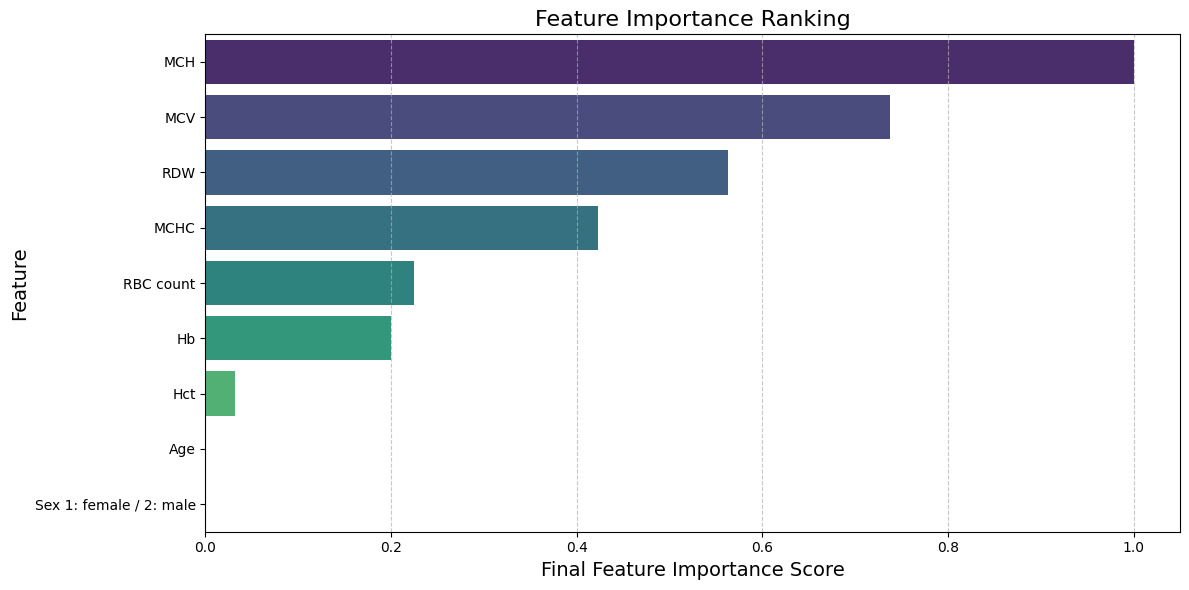

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Run the model and get the final feature importance
result = amse_dfi(X, y)

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(
    y=result['Feature'],
    x=result['Final_Score'],
    palette='viridis'
)
plt.xlabel("Final Feature Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance Ranking", fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the figure for your paper
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
